In [1]:
import pandas as pd

df = pd.read_csv('data/assistments2009.csv')

In [2]:
n = df['user'].nunique()
prop_train = 0.5
n_train = int(n * prop_train)

In [3]:
n_train

2081

In [4]:
import numpy as np

np.random.seed(42)
user_train = np.random.choice(df['user'].unique(), size=n_train, replace=False)
user_train

array([1664,  251,  129, ..., 2717, 2927, 2164])

In [5]:
df_train = df[df['user'].isin(user_train)]
df_train = pd.read_csv('data/assistments2009train.csv')
user_train = df_train['user'].unique()
df_train

,user,item,skill,correct,wins,fails
0,2099,76429,90,0,0,0
1,2099,76430,90,1,0,1
2,2099,76431,90,1,1,1
3,2099,76432,90,1,2,1
4,2099,76433,90,0,3,1
...,...,...,...,...,...,...
140180,488,135605,6,1,5,1
140181,488,135607,6,1,6,1
140182,488,135601,6,1,7,1
140183,488,135602,6,1,8,1


In [6]:
train_users = sorted(df_train['user'].unique())
train_users

[3,
 5,
 6,
 7,
 9,
 10,
 11,
 12,
 14,
 15,
 16,
 17,
 19,
 21,
 22,
 23,
 24,
 25,
 26,
 29,
 30,
 35,
 38,
 39,
 40,
 42,
 43,
 44,
 45,
 46,
 49,
 50,
 54,
 55,
 56,
 57,
 58,
 59,
 60,
 62,
 63,
 65,
 66,
 67,
 68,
 69,
 73,
 76,
 78,
 80,
 83,
 85,
 88,
 89,
 91,
 93,
 95,
 96,
 98,
 100,
 101,
 103,
 106,
 107,
 108,
 112,
 113,
 114,
 119,
 121,
 123,
 127,
 129,
 131,
 132,
 133,
 134,
 138,
 139,
 140,
 141,
 143,
 145,
 146,
 147,
 149,
 151,
 154,
 156,
 157,
 158,
 161,
 163,
 164,
 165,
 168,
 169,
 173,
 175,
 176,
 177,
 180,
 181,
 182,
 183,
 185,
 186,
 187,
 189,
 193,
 197,
 199,
 200,
 206,
 211,
 212,
 213,
 214,
 216,
 218,
 219,
 222,
 226,
 227,
 230,
 231,
 232,
 233,
 236,
 237,
 238,
 240,
 242,
 244,
 245,
 250,
 251,
 255,
 257,
 261,
 262,
 263,
 264,
 266,
 267,
 271,
 272,
 273,
 275,
 277,
 278,
 281,
 282,
 286,
 288,
 290,
 293,
 296,
 297,
 299,
 300,
 302,
 303,
 305,
 306,
 307,
 310,
 313,
 314,
 315,
 316,
 319,
 322,
 323,
 326,
 327,
 333,
 3

In [7]:
def anonymize(df, p=0.1):
    df_anon = df.sample(frac=1-p, random_state=42).sort_index().reset_index(drop=True)
    return df_anon

In [8]:
anonymize(df_train, p=0.99)

,user,item,skill,correct,wins,fails
0,878,85486,46,1,1,1
1,508,97555,99,0,0,0
2,38,54067,81,1,0,1
3,2651,85462,46,1,1,0
4,2940,53836,80,1,0,0
...,...,...,...,...,...,...
1397,488,147839,50,1,4,2
1398,488,55047,120,1,6,6
1399,488,86849,43,1,6,2
1400,488,93915,58,1,2,1


In [9]:
def df_to_seq(df):
    return {
        user_id: [tuple(x) for x in user[['skill', 'correct']].to_numpy()]
        #[tuple(x) for x in user[['item_id', 'skill_id', 'correct']].to_numpy()]
        for user_id, user in df.groupby('user')
    }
seq = df_to_seq(df)
seq[0][:10], seq[1][:10]

([(81, 0),
  (81, 1),
  (81, 0),
  (81, 1),
  (81, 1),
  (83, 1),
  (82, 1),
  (83, 1),
  (43, 1),
  (81, 1)],
 [(38, 1),
  (38, 1),
  (81, 0),
  (81, 1),
  (81, 1),
  (81, 1),
  (8, 0),
  (8, 0),
  (8, 0),
  (8, 0)])

In [10]:
def lcs(a, b):
    if len(a) < len(b):
        a, b = b, a
    dp = np.zeros((2, len(b)+1), dtype=int)
    for i in range(1, len(a)+1):
        for j in range(1, len(b)+1):
            if a[i-1] == b[j-1]:
                dp[i&1][j] = 1 + dp[(i&1)^1][j-1]
            else:
                dp[i&1][j] = max(dp[(i&1)^1][j], dp[i&1][j-1])
    return dp[len(a)&1,-1]

lcs([(1, 2), (2, 1), (2, 0), (3, 1), (3, 0)], [(1, 2), (3, 1), (2, 0), (2, 1), (3, 0)])

3

In [11]:
import string

ALPHABET = np.array(list(string.ascii_lowercase))

def generate_guess(n):
    return np.random.choice(ALPHABET, size=n)

D = [(''.join(generate_guess(200)), ''.join(generate_guess(200))) for _ in range(100)]

In [12]:
lcs(seq[0], seq[1])

58

In [13]:
import struct

N_SKILLS = df['skill'].max()+1

def encode(s):
    # return b''.join([struct.pack(">H", skill + correct * N_SKILLS) for skill, correct in s])
    return ''.join([chr(skill + correct * N_SKILLS) for skill, correct in s])

def encode_seq(seq):
    return {user: encode(s) for user, s in seq.items()}

In [14]:
encode(seq[0])

'QÍQÍÍÏÎÏ§Í¢ÌÎÎÌÌ¡\x8eÎÍ\x9f\x9dÎaÝÝÝÝ¢¢ÍÏÏ¢¢¢¢¢\x9d\x9b\x1f\x9b\x9b\x9b\x9b\x9b\x9b\x93©Ë£ÎÎµ¬11\xad\xad\xad66²²²6²²6²ÌÎÎÌ¦¦¦¦§§Î\x9d\x9d\x9d\x9e\x9e\x9e\x9e\x9e\x9e\x9f\x9f\x9f\x9f##\x9f\x9f#ÝÝÞÞ«/«««««©³®®®®¡¯±±±±±®®®®®µ2®®®®~-~1\xad\xad\xad«¤¤¤(¤¤¤¤¤ÏÌ°°²6²²²²\x9f##\x9f\x9f\x9f\x9f\x9f²¢¢ÌÏÏ¢¢¢¢\x9d\x9b\x9b\x9b\x9b\x9b\x1f\x9b\x9b\x9b\x93©Ë£ÎÎµ¬1111\xad\xad²²66²²²6ÎÎÌ¦¦*¦¦¦§§\x9d\x9d\x9d\x9e\x9e\x9e\x9e\x9e\x9f\x9f##\x9f\x9f#ÝÝÞÞ«//««««©7³7³³³®®®®¡3¯¯¯±±±±±²²²²²#\x9f\x9f\x9f#\x9f\x9f\x9f\x9f«®®®®®µ®®©\xad~«((¤¤¤¤¤ÏÌ°4°°°\x8e\x8e\x92\x15\x91\x15\x91\x15\x15\x91À\x15\x91\x15\x91\x15ò\x91À\x91\x91\x91\x91\x15\x91\x15\x15\x91\x91\x91\x91\x91\x91\x15\x91\x91\x91\x8f\x1e\x9a\x9a\x9a\x9a\x9a\x8c\x8cUÐÒÐ\x91\x91\x9f}}\x02~~~\x02~~~~~\x0e\x8a\x8a\x8a\x8a\x8a\x89\x7f\x7f\x7f\x83\x83\x88\x86\x83\x83\x83\x83\x83ª.ªª.ªªªªªªª\r\x89\x89\r\x89\x89\x89\x8b\x89\x8b\x8b\x8b\x8b\x83\x83\x83\x83\x81\x81¿\x82\x82\x82\x84\x84\x84\x84\x84\x84\x84\x08\x08\x84\x84\x84ßßßcßßßßdàààdàà¼¼ààcßßßßßßßß¸ôôß\x80\x80

In [15]:
import pylcs

pylcs.lcs(encode(seq[0]), encode(seq[1]))

58

In [16]:
%%time

for a, b in D:
    lcs(a, b)

CPU times: user 3.16 s, sys: 0 ns, total: 3.16 s
Wall time: 3.16 s


In [32]:
%%time

for a, b in D:
    pylcs.lcs(a, b)

CPU times: user 35 ms, sys: 89 µs, total: 35.1 ms
Wall time: 32.3 ms


In [33]:
from joblib import Parallel, delayed
from tqdm import tqdm
from sklearn.metrics import roc_curve
from math import log, exp

def score(s, seq):
    sc = 0
    s_encode = encode(s)
    for user2, s2 in seq.items():
        #l = lcs(s, s2)
        #l = log(1 - pylcs.lcs(s_encode, s2) / len(s))
        # l = exp(pylcs.lcs(s_encode, s2) / len(s))
        l = pylcs.lcs(s_encode, s2) / len(s)
        sc = max(sc, l)
        # sc += l
        # sc *= (1 - l)
    return sc
    # return log(sc)

def identify(seq, df_anon):
    seq_anon = df_to_seq(df_anon)
    seq_anon_enc = encode_seq(seq_anon)
    
    def foo(user, s):
        sc = score(s, seq_anon_enc)
        return int(user in train_users), sc
        
    y_true, y_score = map(list, zip(*Parallel(n_jobs=5)(
        delayed(foo)(user, s) for user, s in tqdm(seq.items()))
    ))
    
    # plt.hist(y_score, bins=100)
    
    return roc_curve(y_true, y_score)

In [34]:
roc_data = {}

def compute_roc(p=0.5):
    if p in roc_data:
        return
    fpr, tpr, thresholds = identify(seq, anonymize(df_train, p=p))
    roc_data[p] = (fpr, tpr, thresholds)

In [35]:
for p in [0, 0.25, 0.5, 0.75, 0.99, 0.999]:
    print(p)
    compute_roc(p)

0


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4163/4163 [00:35<00:00, 115.93it/s]


0.25


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4163/4163 [00:28<00:00, 143.82it/s]


0.5


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4163/4163 [00:23<00:00, 173.70it/s]


0.75


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4163/4163 [00:17<00:00, 244.60it/s]


0.99


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4163/4163 [00:03<00:00, 1154.09it/s]


0.999


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4163/4163 [00:01<00:00, 2569.11it/s]


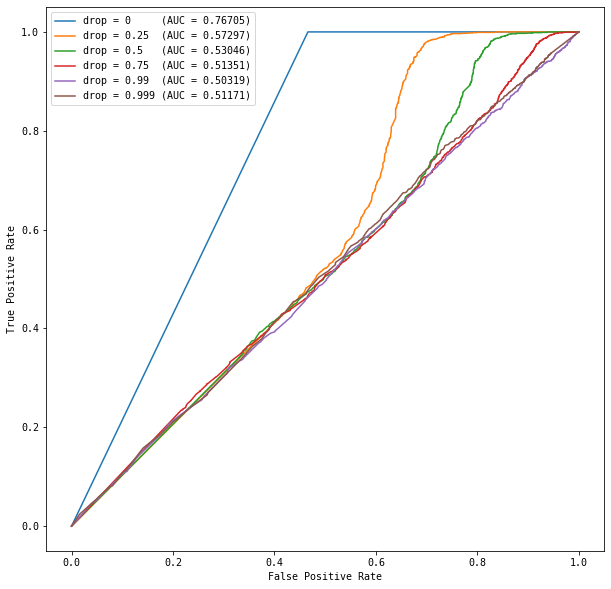

In [36]:
import matplotlib.pyplot as plt
from sklearn import metrics

plt.rcParams['figure.figsize'] = [10, 10]
plt.rcParams['font.family'] = 'monospace'
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

for p in sorted(roc_data.keys()):
    (fpr, tpr, _) = roc_data[p]
    roc_auc = metrics.auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f'drop = {p:<5} (AUC = {roc_auc:.5f})')

plt.legend()

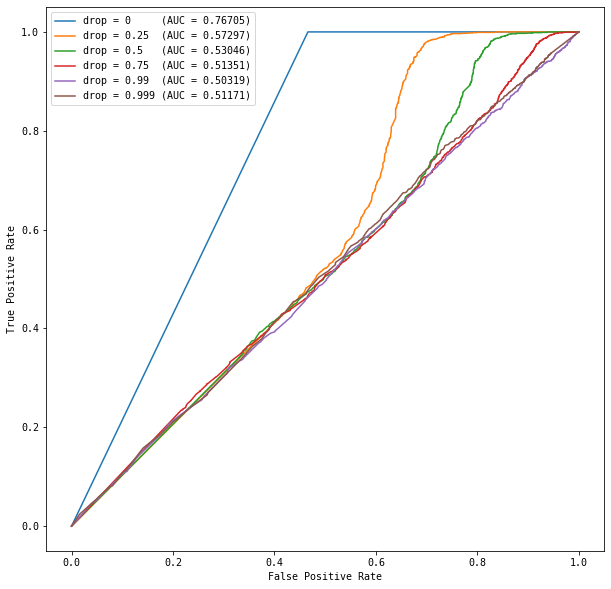

In [37]:
plt.rcParams['figure.figsize'] = [10, 10]
plt.rcParams['font.family'] = 'monospace'
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

for p in sorted(roc_data.keys()):
    (fpr, tpr, _) = roc_data[p]
    roc_auc = metrics.auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f'drop = {p:<5} (AUC = {roc_auc:.5f})')

plt.legend()

In [38]:
lengths = np.array([len(s) for s in seq.values() if len(s)])

((array([311., 208., 293., 266.,  89., 260., 162., 185., 140., 139.]),
  array([ 1. ,  2.8,  4.6,  6.4,  8.2, 10. , 11.8, 13.6, 15.4, 17.2, 19. ]),
  <BarContainer object of 10 artists>),
 2053)

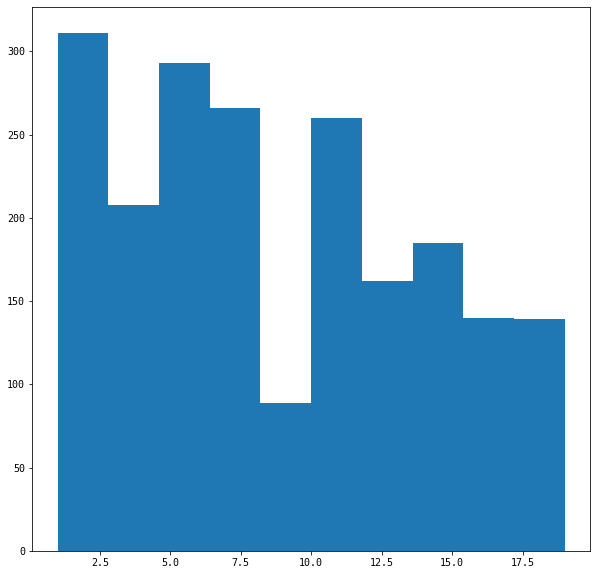

In [39]:
plt.hist(lengths[lengths < 20]), len(lengths[lengths < 20])

In [40]:
# df_train.to_csv(f'data/assistments2009train.csv', index=False)

In [47]:
data_path = 'ktm-git/data/assistments09/data_jjv_09'

In [48]:
df_gen = pd.read_csv(data_path+'/data.csv')

In [49]:
df_gen

,user,skill,theta,skill_diff,proba,correct,item,wins,fails
0,0,29,1.276753,-1.620475,0.414906,1,0,0,0
1,0,21,1.276753,-0.468333,0.691773,0,0,0,0
2,0,21,1.276753,-0.468333,0.691773,1,0,0,0
3,0,21,1.276753,-0.468333,0.691773,1,0,0,0
4,0,52,1.276753,-0.658119,0.649908,1,0,0,0
...,...,...,...,...,...,...,...,...,...
211579,4199,33,NaN,0.748069,NaN,0,0,0,0
211580,4199,33,NaN,0.748069,NaN,0,0,0,0
211581,4199,33,NaN,0.748069,NaN,0,0,0,0
211582,4199,33,NaN,0.748069,NaN,0,0,0,0


In [50]:
rnn_roc = identify(seq, df_gen)

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4163/4163 [00:57<00:00, 73.02it/s]


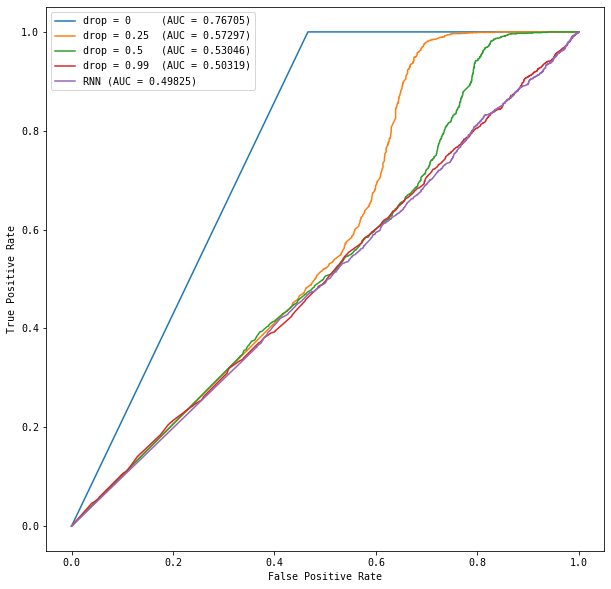

In [51]:
plt.rcParams['figure.figsize'] = [10, 10]
plt.rcParams['font.family'] = 'monospace'
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

for p in [0, 0.25, 0.5, 0.99]:
    (fpr, tpr, _) = roc_data[p]
    roc_auc = metrics.auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f'drop = {p:<5} (AUC = {roc_auc:.5f})')
    
roc_auc = metrics.auc(rnn_roc[0], rnn_roc[1])
plt.plot(rnn_roc[0], rnn_roc[1], label=f'RNN (AUC = {roc_auc:.5f})')

plt.legend()

In [46]:
identify(seq, anonymize(df_train, p=0.5))

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4163/4163 [00:23<00:00, 179.23it/s]


(array([0.        , 0.32949087, 0.32997118, 0.32997118, 0.3309318 ,
        0.3314121 , 0.3314121 , 0.33237272, 0.33285303, 0.33285303,
        0.33381364, 0.33429395, 0.33621518, 0.33621518, 0.33717579,
        0.33861671, 0.34005764, 0.34005764, 0.3439001 , 0.34678194,
        0.34678194, 0.35014409, 0.35014409, 0.35446686, 0.35446686,
        0.36071085, 0.36119116, 0.36407301, 0.36455331, 0.36455331,
        0.370317  , 0.370317  , 0.37415946, 0.37512008, 0.38568684,
        0.38760807, 0.3895293 , 0.3895293 , 0.39769452, 0.39817483,
        0.39961575, 0.40105668, 0.40153698, 0.4024976 , 0.4024976 ,
        0.4154659 , 0.4154659 , 0.41690682, 0.41690682, 0.42363112,
        0.42507205, 0.42507205, 0.42555235, 0.43804035, 0.43852065,
        0.43900096, 0.43948127, 0.4414025 , 0.4418828 , 0.4418828 ,
        0.44524496, 0.44524496, 0.44620557, 0.44668588, 0.44860711,
        0.44860711, 0.44908742, 0.44908742, 0.46061479, 0.46205572,
        0.46253602, 0.46397695, 0.46589817, 0.46